In [1]:
import cv2 as cv
import numpy as np

## Question 3

In [ ]:
img1 = cv.imread("shelf.jpg")
img2 = cv.imread("book.jpg")
img1 = cv.resize(img1, (1024, 768), interpolation=cv.INTER_AREA)

img1= cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2= cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

corners1 = cv.goodFeaturesToTrack(img1, maxCorners=200, qualityLevel=0.01, minDistance=10)
corners2 = cv.goodFeaturesToTrack(img2, maxCorners=200, qualityLevel=0.01, minDistance=10)

# print(corners1)
# print(corners2)

for corner in corners1:
    x, y = corner.ravel()
    cv.circle(img1, (int(x), int(y)), 3, (0, 255, 0), -1)

for corner in corners2:
    x, y = corner.ravel()
    cv.circle(img2, (int(x), int(y)), 3, (0, 255, 0), -1)


cv.imshow('Corners', img1)
cv.imshow('Corners2', img2)

cv.waitKey(0)  # Wait until any key is pressed to close the image
cv.destroyAllWindows()

In [11]:
# img1 = cv.imread("shelf.jpg")
h, w = img2.shape
print(f"h:{h}, w; {w}")

h:307, w; 409


I did find that I needed to adjust the value of maxCorners to get better corner accuracy, since any lower would amount to only corners detected in the details of the book such as the words, and anything above 100 would allow me to detect the corners of the book itself. 

### Question 4

In [36]:
img1 = cv.imread("shelf.jpg")
img1 = cv.resize(img1, (1024, 768), interpolation=cv.INTER_AREA)

edges1 = cv.Canny(img1, 50, 150, apertureSize=3)
lines = cv.HoughLinesP(edges1, rho=5, theta=np.pi / 180, threshold=90, minLineLength=10, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv.imshow('Line', img1)
cv.waitKey(0)
cv.destroyAllWindows()


Increasing rho seemed to increase the number of fine lines that would be detected. When i set rho to 1, the number of lines was less, but more straightforward and detecting the more prominent lines. Increasing it increased the number of lines I would see. Similarly, changing threshold would directly affect how many lines there were, but more in the sense of what would be considered heavy enough to be a line. When I set the threshold high, only edges that were truly obviously line-like would be marked. 

### Question 5

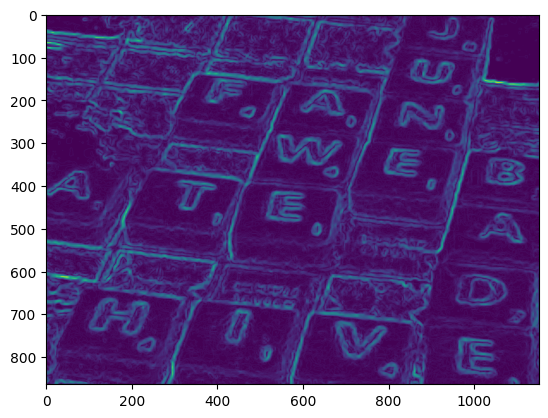

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, data, io


img = cv.imread("scrabble.jpg")

filter2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/10
image = cv.filter2D(src=img, ddepth=-1, kernel=filter2)

(r, g, b) = cv.split(image)
g = g // 2

image = np.dstack((r, g, b))

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

edges_clean_sobel1 = filters.sobel(gray)
plt.imshow(edges_clean_sobel1)
plt.show()